# Análisis Exploratorio de Datos - Series de Tiempo
## Productos de Comestibles

Este notebook contiene el análisis exploratorio de dos series de tiempo correspondientes a las ventas de dos productos estrella de una compañía de comestibles desde junio de 2014.

**Checklist aplicado:**
- ✅ Punto 1: Carga y Exploración Inicial de Datos
- ✅ Punto 2: Preparación y Limpieza de Datos
- ✅ Punto 3: Manejo de Valores Faltantes y Nulos
- ✅ Punto 4: Análisis Exploratorio de Datos (EDA)
- ✅ Punto 5: Análisis de Estacionariedad
- ✅ Punto 6: Identificación del Modelo

Nota: Este checklist es un compendio de lo que he venido aprendiendo en las diferentes asignaturas, el cual me permite tener un orden a la hora de ejecutar proyectos de ML

In [1]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Librerías para análisis de series de tiempo
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats

# Configuración de visualización
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Librerías importadas correctamente")


Librerías importadas correctamente


##  1. Carga y Exploración Inicial de Datos


In [2]:
# Cargar los datos desde el archivo CSV
df = pd.read_csv('data-set.csv', index_col=0)

# Verificar la estructura inicial
print("=" * 60)
print("1.1 ESTRUCTURA INICIAL DE LOS DATOS")
print("=" * 60)
print(f"\nDimensiones del dataset: {df.shape}")
print(f"\nPrimeras filas:")
print(df.head(10))
print(f"\nÚltimas filas:")
print(df.tail(10))
print(f"\nTipos de datos:")
print(df.dtypes)
print(f"\nInformación general:")
print(df.info())


1.1 ESTRUCTURA INICIAL DE LOS DATOS

Dimensiones del dataset: (127, 2)

Primeras filas:
     producto1   producto2
1   500.000000  200.000000
2   497.400893  210.686220
3   478.605317  222.018584
4   486.454125  233.920990
5   479.695678  238.402098
6   474.222492  247.623815
7   484.103665  249.901717
8   481.695269  261.832340
9   476.705402  277.360465
10  468.330510  286.418917

Últimas filas:
      producto1   producto2
118  182.526256  597.926177
119  170.390001  600.996258
120  168.328425  604.917189
121  165.274599  610.997203
122  164.625472  624.502102
123  164.610771  629.293034
124  150.881839  637.099467
125  151.788470  653.155282
126  137.047639  672.528345
127  141.990873  676.058092

Tipos de datos:
producto1    float64
producto2    float64
dtype: object

Información general:
<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 1 to 127
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   producto1  1

In [3]:
# Crear índice temporal desde junio de 2014 (datos mensuales)
# El dataset tiene 127 observaciones
fecha_inicio = pd.Timestamp('2014-06-01')
indice_temporal = pd.date_range(start=fecha_inicio, periods=len(df), freq='M')

# Asignar el índice temporal al DataFrame
df.index = indice_temporal

print("=" * 60)
print("1.2 ÍNDICE TEMPORAL CREADO")
print("=" * 60)
print(f"\nFecha inicial: {df.index[0]}")
print(f"\nFecha final: {df.index[-1]}")
print(f"\nFrecuencia: Mensual")
print(f"\nTotal de observaciones: {len(df)}")
print(f"\nRango temporal: {df.index[-1] - df.index[0]}")
print(f"\nPrimeras fechas:")
print(df.head())


1.2 ÍNDICE TEMPORAL CREADO

Fecha inicial: 2014-06-30 00:00:00

Fecha final: 2024-12-31 00:00:00

Frecuencia: Mensual

Total de observaciones: 127

Rango temporal: 3837 days 00:00:00

Primeras fechas:
             producto1   producto2
2014-06-30  500.000000  200.000000
2014-07-31  497.400893  210.686220
2014-08-31  478.605317  222.018584
2014-09-30  486.454125  233.920990
2014-10-31  479.695678  238.402098


In [4]:
# Estadísticas descriptivas básicas
print("=" * 60)
print("1.3 ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 60)
print("\nEstadísticas descriptivas:")
print(df.describe())
print("\nMedidas de tendencia central y dispersión:")
print(f"\nProducto 1:")
print(f"  Media: {df['producto1'].mean():.2f}")
print(f"  Mediana: {df['producto1'].median():.2f}")
print(f"  Desviación estándar: {df['producto1'].std():.2f}")
print(f"  Mínimo: {df['producto1'].min():.2f}")
print(f"  Máximo: {df['producto1'].max():.2f}")
print(f"  Rango: {df['producto1'].max() - df['producto1'].min():.2f}")

print(f"\nProducto 2:")
print(f"  Media: {df['producto2'].mean():.2f}")
print(f"  Mediana: {df['producto2'].median():.2f}")
print(f"  Desviación estándar: {df['producto2'].std():.2f}")
print(f"  Mínimo: {df['producto2'].min():.2f}")
print(f"  Máximo: {df['producto2'].max():.2f}")
print(f"  Rango: {df['producto2'].max() - df['producto2'].min():.2f}")


1.3 ESTADÍSTICAS DESCRIPTIVAS

Estadísticas descriptivas:
        producto1   producto2
count  127.000000  127.000000
mean   343.571660  581.037664
std    100.234821  167.504363
min    137.047639  200.000000
25%    256.853812  469.194001
50%    340.644019  626.048401
75%    450.071775  708.941718
max    500.000000  806.440615

Medidas de tendencia central y dispersión:

Producto 1:
  Media: 343.57
  Mediana: 340.64
  Desviación estándar: 100.23
  Mínimo: 137.05
  Máximo: 500.00
  Rango: 362.95

Producto 2:
  Media: 581.04
  Mediana: 626.05
  Desviación estándar: 167.50
  Mínimo: 200.00
  Máximo: 806.44
  Rango: 606.44


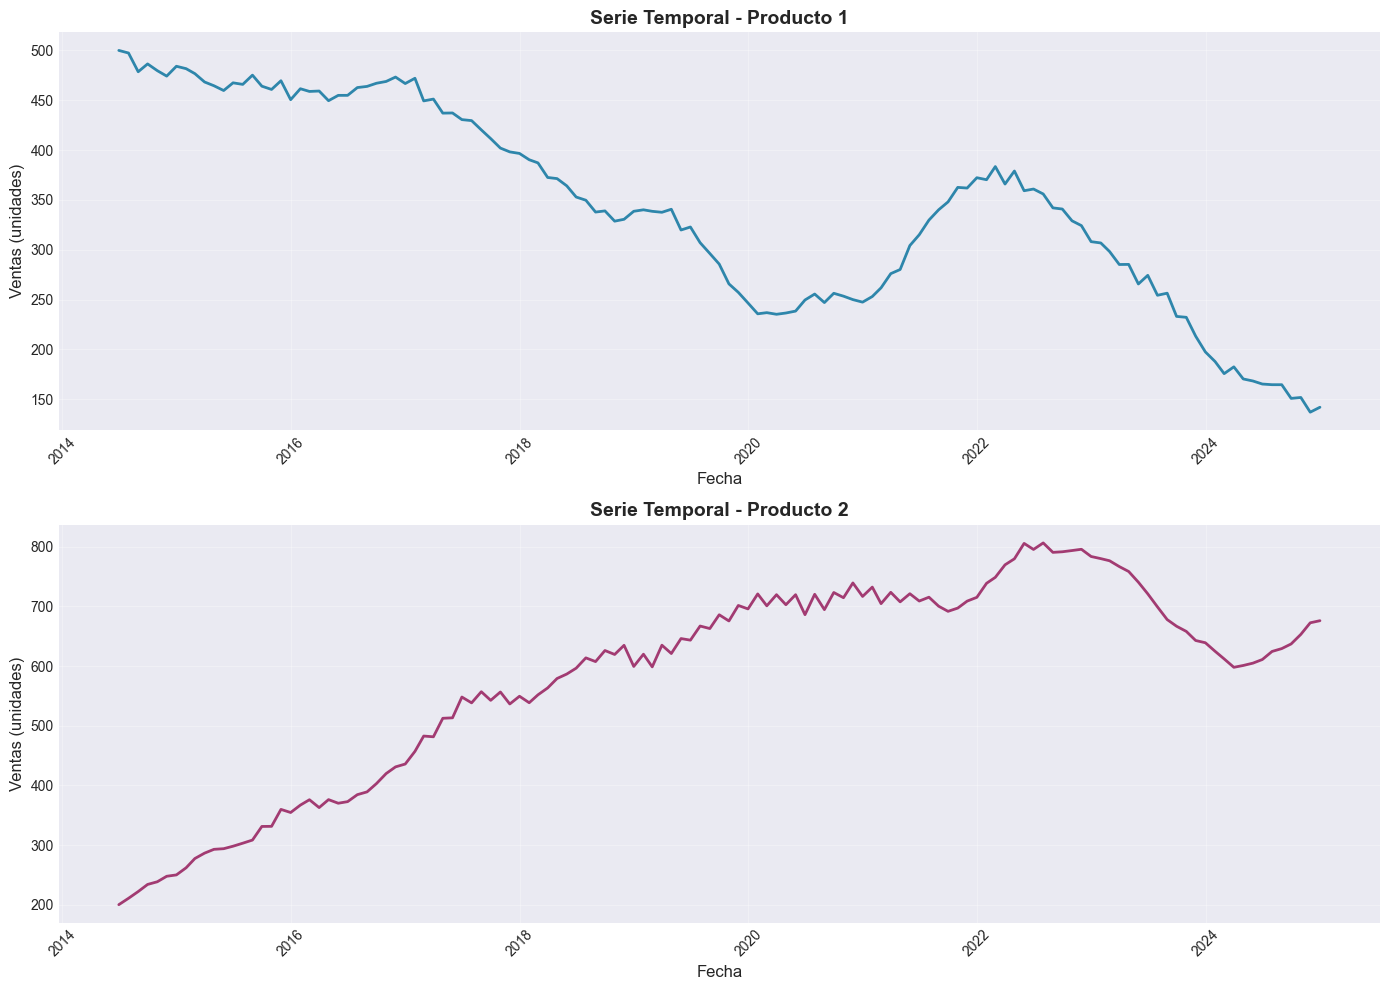

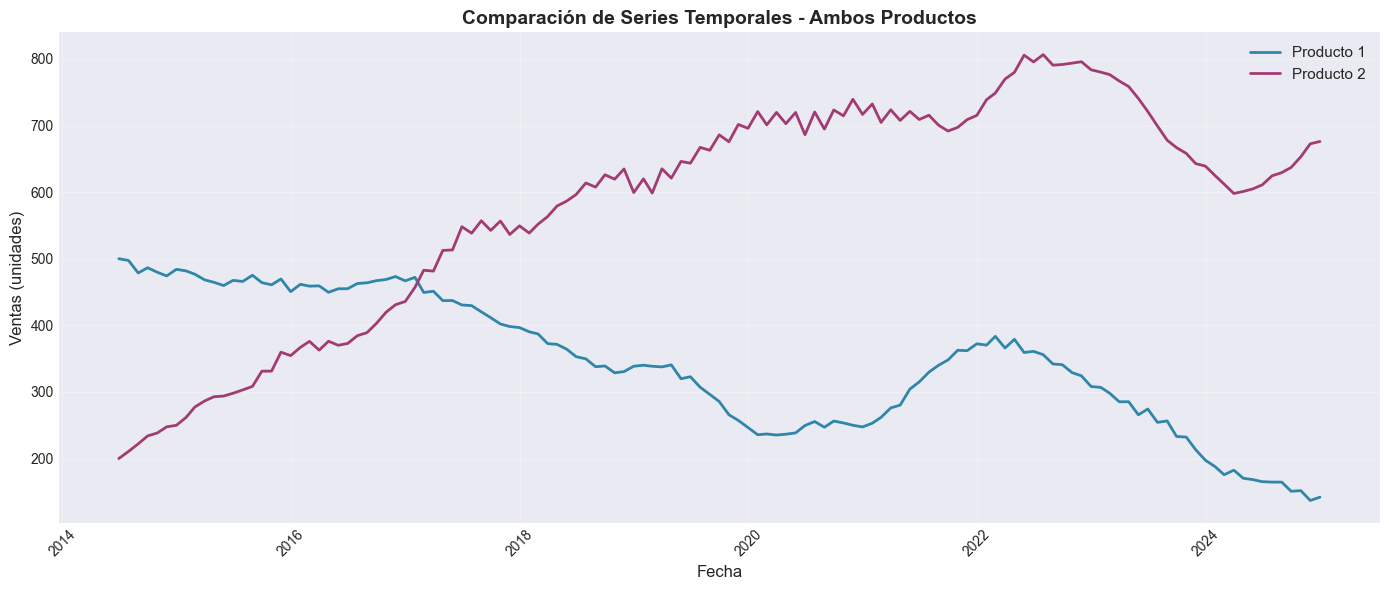

In [5]:
# Visualización inicial de las series completas
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Producto 1
axes[0].plot(df.index, df['producto1'], linewidth=2, color='#2E86AB')
axes[0].set_title('Serie Temporal - Producto 1', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fecha', fontsize=12)
axes[0].set_ylabel('Ventas (unidades)', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Producto 2
axes[1].plot(df.index, df['producto2'], linewidth=2, color='#A23B72')
axes[1].set_title('Serie Temporal - Producto 2', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Fecha', fontsize=12)
axes[1].set_ylabel('Ventas (unidades)', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Visualización conjunta para comparación
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['producto1'], label='Producto 1', linewidth=2, color='#2E86AB')
plt.plot(df.index, df['producto2'], label='Producto 2', linewidth=2, color='#A23B72')
plt.title('Comparación de Series Temporales - Ambos Productos', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas (unidades)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2. Preparación y Limpieza de Datos


In [6]:
# Verificar que el índice esté en formato datetime
print("=" * 60)
print("2.1 VERIFICACIÓN DEL ÍNDICE TEMPORAL")
print("=" * 60)
print(f"\nTipo del índice: {type(df.index)}")
print(f"\nEl índice es datetime: {isinstance(df.index, pd.DatetimeIndex)}")
print(f"\nFrecuencia del índice: {df.index.freq}")

# Establecer frecuencia explícitamente si no está definida
if df.index.freq is None:
    df.index.freq = 'M'
    print("\n✓ Frecuencia 'M' (mensual) establecida explícitamente")


2.1 VERIFICACIÓN DEL ÍNDICE TEMPORAL

Tipo del índice: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

El índice es datetime: True

Frecuencia del índice: <MonthEnd>


In [7]:
# Ordenar los datos por fecha (ascendente)
print("=" * 60)
print("2.2 ORDENAMIENTO DE DATOS")
print("=" * 60)
print(f"\n¿Están ordenados? {df.index.is_monotonic_increasing}")
if not df.index.is_monotonic_increasing:
    df = df.sort_index()
    print("✓ Datos ordenados por fecha")
else:
    print("✓ Los datos ya están ordenados correctamente")


2.2 ORDENAMIENTO DE DATOS

¿Están ordenados? True
✓ Los datos ya están ordenados correctamente


In [8]:
# Verificar duplicados en las fechas
print("=" * 60)
print("2.3 VERIFICACIÓN DE DUPLICADOS")
print("=" * 60)
duplicados = df.index.duplicated()
if duplicados.any():
    print(f"\n⚠ ADVERTENCIA: Se encontraron {duplicados.sum()} fechas duplicadas")
    print(df[df.index.duplicated(keep=False)])
else:
    print("\n✓ No hay fechas duplicadas")


2.3 VERIFICACIÓN DE DUPLICADOS

✓ No hay fechas duplicadas


In [9]:
# Verificar continuidad temporal (gaps en las fechas)
print("=" * 60)
print("2.4 VERIFICACIÓN DE CONTINUIDAD TEMPORAL")
print("=" * 60)

# Crear rango completo esperado
rango_completo = pd.date_range(start=df.index[0], end=df.index[-1], freq='M')
fechas_faltantes = rango_completo.difference(df.index)

if len(fechas_faltantes) > 0:
    print(f"\n⚠ ADVERTENCIA: Se encontraron {len(fechas_faltantes)} fechas faltantes:")
    print(fechas_faltantes)
else:
    print("\n✓ No hay gaps en las fechas - la serie es continua")

print(f"\nFechas esperadas: {len(rango_completo)}")
print(f"Fechas presentes: {len(df)}")
print(f"Diferencia: {len(rango_completo) - len(df)}")


2.4 VERIFICACIÓN DE CONTINUIDAD TEMPORAL

✓ No hay gaps en las fechas - la serie es continua

Fechas esperadas: 127
Fechas presentes: 127
Diferencia: 0


2.5 IDENTIFICACIÓN DE VALORES ATÍPICOS (OUTLIERS)

Producto 1:
  Q1: 256.85
  Q3: 450.07
  IQR: 193.22
  Límite inferior: -32.97
  Límite superior: 739.90
  Número de outliers: 0

Producto 2:
  Q1: 469.19
  Q3: 708.94
  IQR: 239.75
  Límite inferior: 109.57
  Límite superior: 1068.56
  Número de outliers: 0


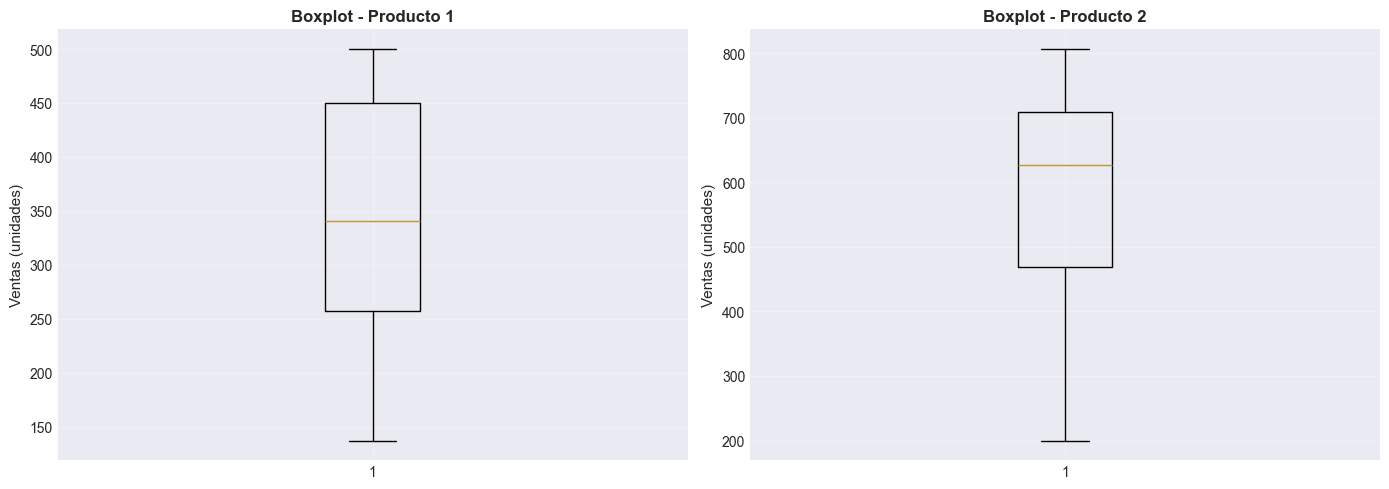

In [10]:
# Identificar valores atípicos usando el método IQR
print("=" * 60)
print("2.5 IDENTIFICACIÓN DE VALORES ATÍPICOS (OUTLIERS)")
print("=" * 60)

def identificar_outliers(serie, nombre):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = serie[(serie < limite_inferior) | (serie > limite_superior)]
    
    print(f"\n{nombre}:")
    print(f"  Q1: {Q1:.2f}")
    print(f"  Q3: {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Límite inferior: {limite_inferior:.2f}")
    print(f"  Límite superior: {limite_superior:.2f}")
    print(f"  Número de outliers: {len(outliers)}")
    
    if len(outliers) > 0:
        print(f"  Outliers encontrados:")
        for fecha, valor in outliers.items():
            print(f"    {fecha.strftime('%Y-%m')}: {valor:.2f}")
    
    return outliers

outliers_p1 = identificar_outliers(df['producto1'], 'Producto 1')
outliers_p2 = identificar_outliers(df['producto2'], 'Producto 2')

# Visualización de outliers
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot Producto 1
axes[0].boxplot(df['producto1'], vert=True)
axes[0].set_title('Boxplot - Producto 1', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Ventas (unidades)', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Boxplot Producto 2
axes[1].boxplot(df['producto2'], vert=True)
axes[1].set_title('Boxplot - Producto 2', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Ventas (unidades)', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 3. Manejo de Valores Faltantes y Nulos


In [11]:
# Identificar valores faltantes y nulos
print("=" * 60)
print("3.1 IDENTIFICACIÓN DE VALORES FALTANTES")
print("=" * 60)

valores_nulos = df.isnull().sum()
valores_nulos_pct = (df.isnull().sum() / len(df)) * 100

print("\nCantidad de valores nulos por columna:")
print(valores_nulos)
print("\nPorcentaje de valores nulos por columna:")
print(valores_nulos_pct)

if valores_nulos.sum() == 0:
    print("\n✓ No se encontraron valores nulos en el dataset")
else:
    print("\n⚠ ADVERTENCIA: Se encontraron valores nulos")
    print("\nUbicación de valores nulos:")
    print(df[df.isnull().any(axis=1)])


3.1 IDENTIFICACIÓN DE VALORES FALTANTES

Cantidad de valores nulos por columna:
producto1    0
producto2    0
dtype: int64

Porcentaje de valores nulos por columna:
producto1    0.0
producto2    0.0
dtype: float64

✓ No se encontraron valores nulos en el dataset


In [12]:
# Análisis del patrón de valores faltantes (si existen)
if valores_nulos.sum() > 0:
    print("=" * 60)
    print("3.2 ANÁLISIS DEL PATRÓN DE VALORES FALTANTES")
    print("=" * 60)
    
    # Verificar si los valores faltantes son aleatorios o sistemáticos
    for col in df.columns:
        nulos = df[col].isnull()
        if nulos.any():
            print(f"\n{col}:")
            print(f"  Total de nulos: {nulos.sum()}")
            print(f"  Porcentaje: {nulos.sum()/len(df)*100:.2f}%")
            
            # Verificar si hay patrones
            indices_nulos = df[nulos].index
            print(f"  Fechas con valores nulos:")
            for fecha in indices_nulos:
                print(f"    {fecha.strftime('%Y-%m')}")
else:
    print("=" * 60)
    print("3.2 ANÁLISIS DEL PATRÓN DE VALORES FALTANTES")
    print("=" * 60)
    print("\n✓ No hay valores faltantes - no se requiere imputación")


3.2 ANÁLISIS DEL PATRÓN DE VALORES FALTANTES

✓ No hay valores faltantes - no se requiere imputación


In [13]:
# Estrategia de imputación (si fuera necesario)
# En este caso, como no hay valores nulos, solo documentamos la estrategia

print("=" * 60)
print("3.3 ESTRATEGIA DE IMPUTACIÓN")
print("=" * 60)
print("\nEstrategias disponibles para valores faltantes en series de tiempo:")
print("  1. Interpolación lineal: Útil para valores faltantes aislados")
print("  2. Forward fill: Llenar con el último valor conocido")
print("  3. Backward fill: Llenar con el siguiente valor conocido")
print("  4. Promedio móvil: Usar promedio de valores adyacentes")
print("  5. Métodos estadísticos avanzados: ARIMA, etc.")

# Ejemplo de cómo se haría (no se ejecuta porque no hay nulos)
# df_imputado = df.copy()
# df_imputado['producto1'] = df_imputado['producto1'].interpolate(method='linear')
# df_imputado['producto2'] = df_imputado['producto2'].interpolate(method='linear')

print("\n✓ En este dataset no se requiere imputación")


3.3 ESTRATEGIA DE IMPUTACIÓN

Estrategias disponibles para valores faltantes en series de tiempo:
  1. Interpolación lineal: Útil para valores faltantes aislados
  2. Forward fill: Llenar con el último valor conocido
  3. Backward fill: Llenar con el siguiente valor conocido
  4. Promedio móvil: Usar promedio de valores adyacentes
  5. Métodos estadísticos avanzados: ARIMA, etc.

✓ En este dataset no se requiere imputación


## 4. Análisis Exploratorio de Datos (EDA)


4.1 VISUALIZACIÓN DETALLADA DE LAS SERIES


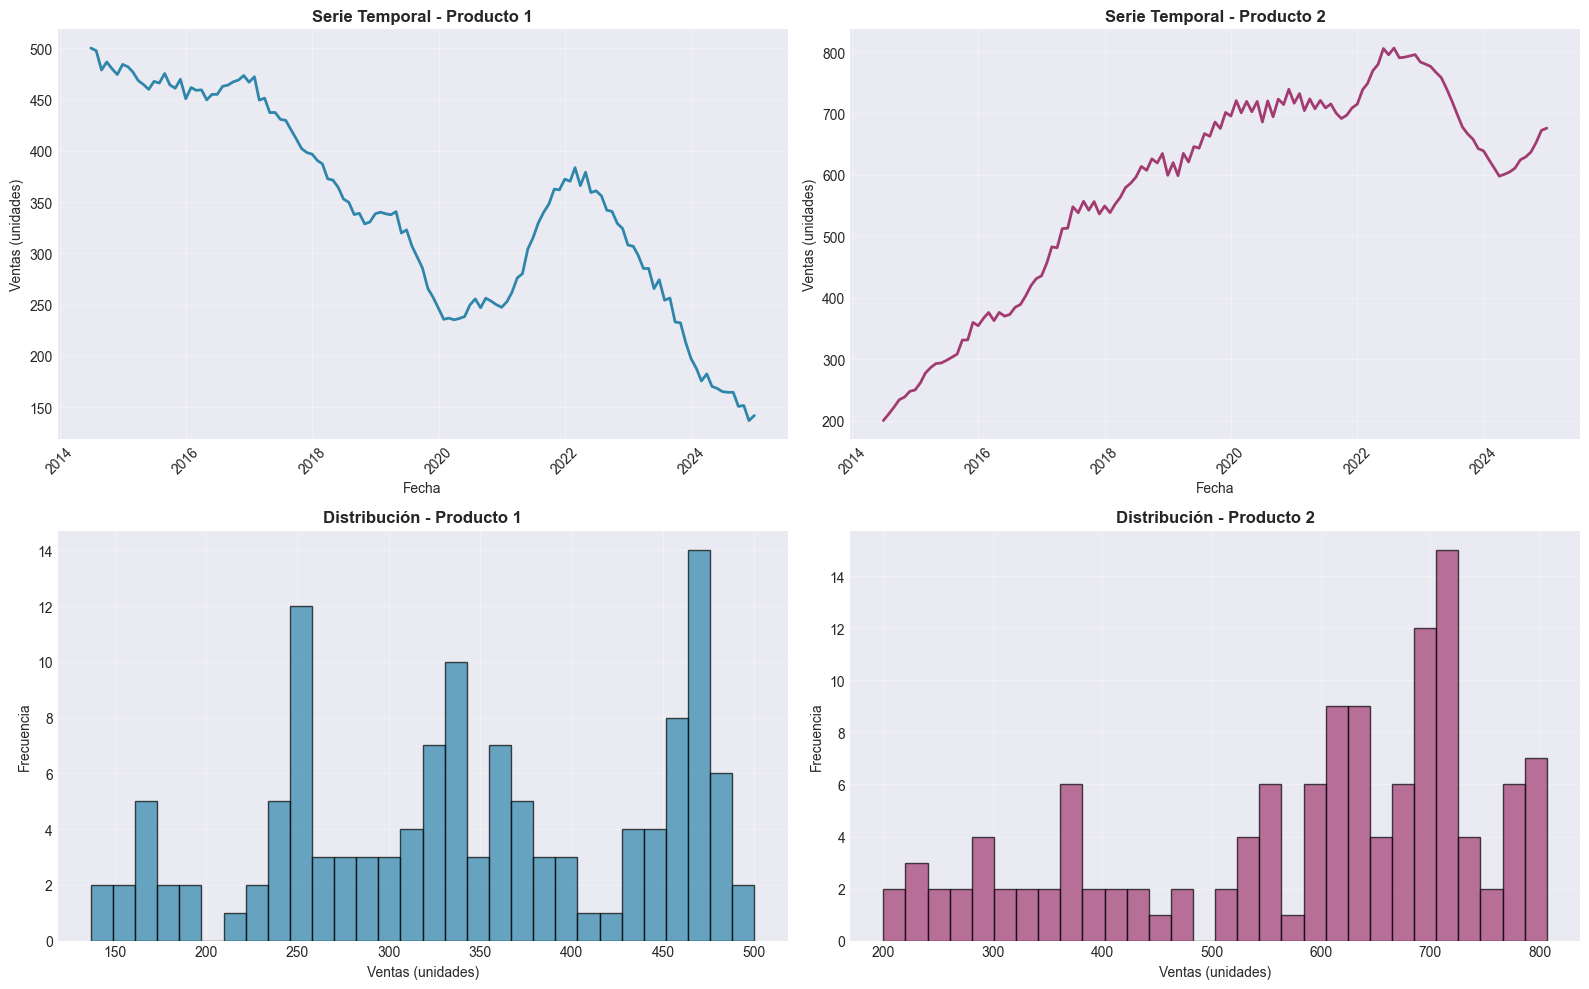

In [14]:
# Visualización detallada de las series temporales
print("=" * 60)
print("4.1 VISUALIZACIÓN DETALLADA DE LAS SERIES")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Serie temporal Producto 1
axes[0, 0].plot(df.index, df['producto1'], linewidth=2, color='#2E86AB')
axes[0, 0].set_title('Serie Temporal - Producto 1', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Fecha', fontsize=10)
axes[0, 0].set_ylabel('Ventas (unidades)', fontsize=10)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Serie temporal Producto 2
axes[0, 1].plot(df.index, df['producto2'], linewidth=2, color='#A23B72')
axes[0, 1].set_title('Serie Temporal - Producto 2', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Fecha', fontsize=10)
axes[0, 1].set_ylabel('Ventas (unidades)', fontsize=10)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Histograma Producto 1
axes[1, 0].hist(df['producto1'], bins=30, color='#2E86AB', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Distribución - Producto 1', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Ventas (unidades)', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# Histograma Producto 2
axes[1, 1].hist(df['producto2'], bins=30, color='#A23B72', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Distribución - Producto 2', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Ventas (unidades)', fontsize=10)
axes[1, 1].set_ylabel('Frecuencia', fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


4.2 DESCOMPOSICIÓN DE SERIES TEMPORALES


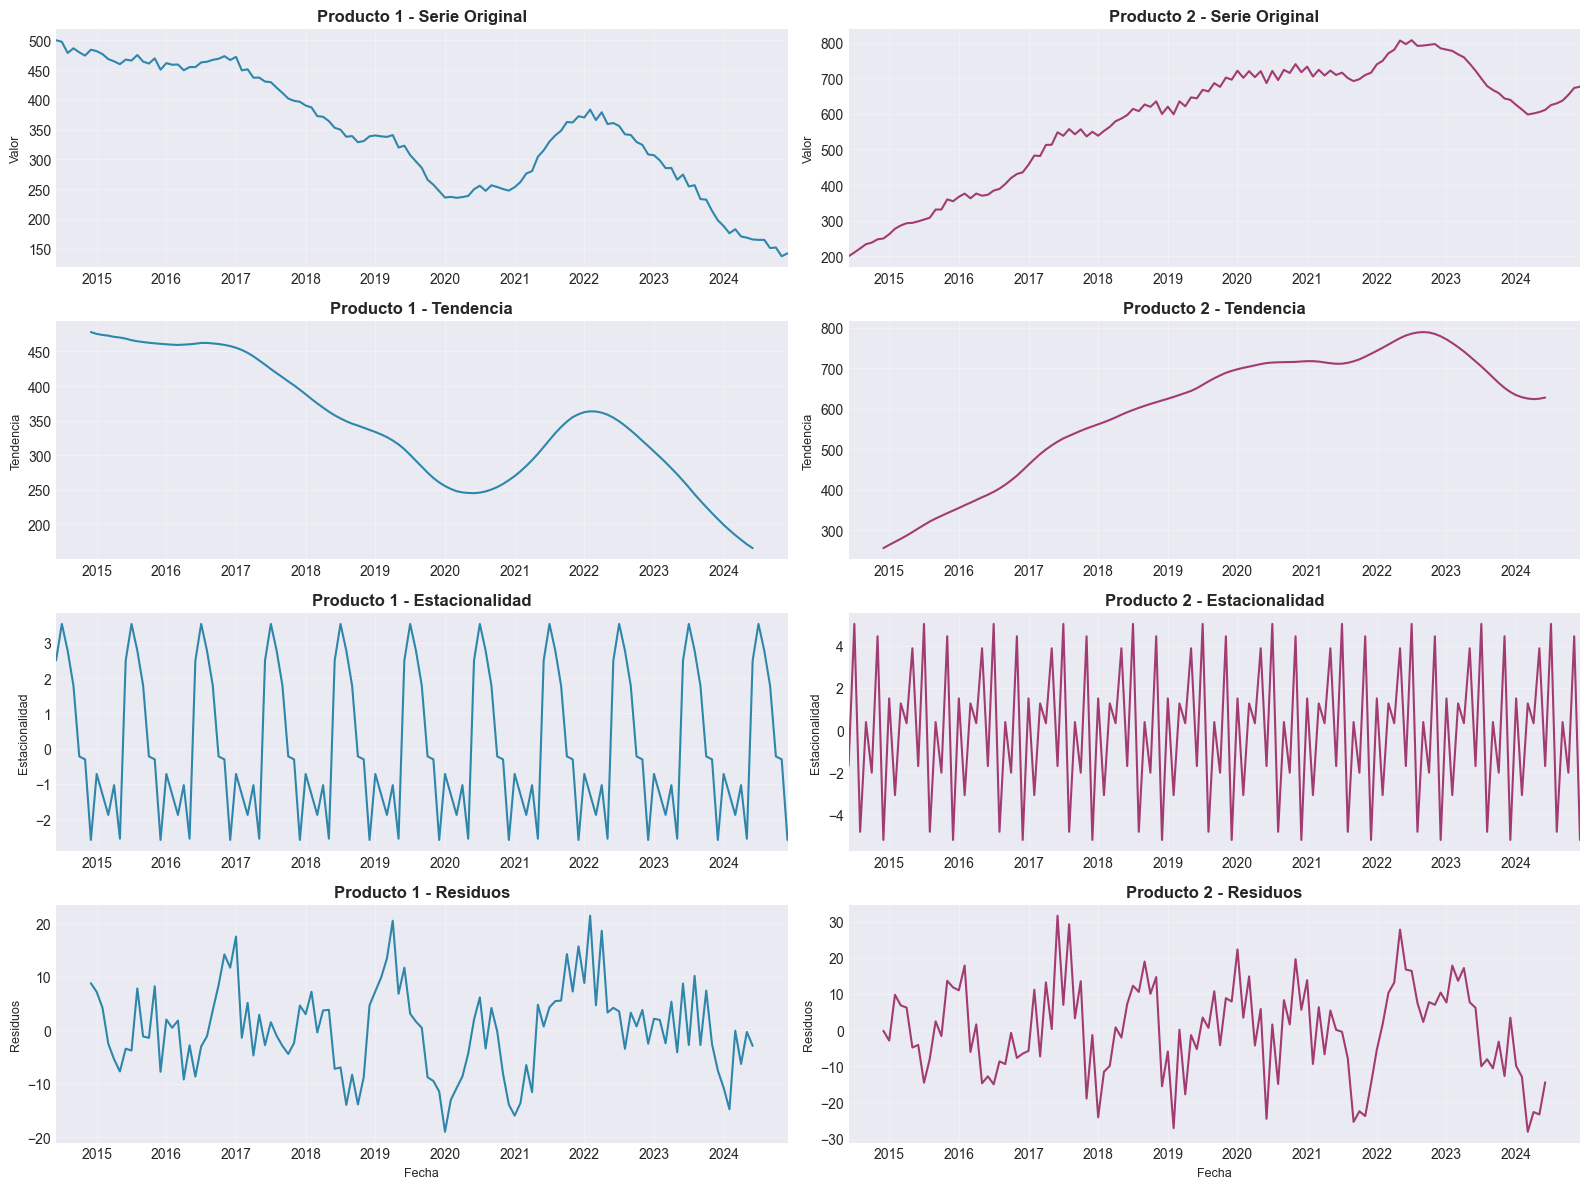


Análisis de Componentes:

Producto 1:
  Variabilidad de la tendencia: 87.55
  Variabilidad de la estacionalidad: 2.06
  Variabilidad de los residuos: 8.12

Producto 2:
  Variabilidad de la tendencia: 152.72
  Variabilidad de la estacionalidad: 3.35
  Variabilidad de los residuos: 12.77


In [15]:
# Descomposición de las series temporales
print("=" * 60)
print("4.2 DESCOMPOSICIÓN DE SERIES TEMPORALES")
print("=" * 60)

# Descomposición Producto 1
decompose_p1 = seasonal_decompose(df['producto1'], model='additive', period=12)

# Descomposición Producto 2
decompose_p2 = seasonal_decompose(df['producto2'], model='additive', period=12)

# Visualización de la descomposición
fig, axes = plt.subplots(4, 2, figsize=(16, 12))

# Producto 1 - Descomposición
decompose_p1.observed.plot(ax=axes[0, 0], color='#2E86AB', linewidth=1.5)
axes[0, 0].set_title('Producto 1 - Serie Original', fontweight='bold')
axes[0, 0].set_ylabel('Valor', fontsize=9)
axes[0, 0].grid(True, alpha=0.3)

decompose_p1.trend.plot(ax=axes[1, 0], color='#2E86AB', linewidth=1.5)
axes[1, 0].set_title('Producto 1 - Tendencia', fontweight='bold')
axes[1, 0].set_ylabel('Tendencia', fontsize=9)
axes[1, 0].grid(True, alpha=0.3)

decompose_p1.seasonal.plot(ax=axes[2, 0], color='#2E86AB', linewidth=1.5)
axes[2, 0].set_title('Producto 1 - Estacionalidad', fontweight='bold')
axes[2, 0].set_ylabel('Estacionalidad', fontsize=9)
axes[2, 0].grid(True, alpha=0.3)

decompose_p1.resid.plot(ax=axes[3, 0], color='#2E86AB', linewidth=1.5)
axes[3, 0].set_title('Producto 1 - Residuos', fontweight='bold')
axes[3, 0].set_ylabel('Residuos', fontsize=9)
axes[3, 0].set_xlabel('Fecha', fontsize=9)
axes[3, 0].grid(True, alpha=0.3)

# Producto 2 - Descomposición
decompose_p2.observed.plot(ax=axes[0, 1], color='#A23B72', linewidth=1.5)
axes[0, 1].set_title('Producto 2 - Serie Original', fontweight='bold')
axes[0, 1].set_ylabel('Valor', fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

decompose_p2.trend.plot(ax=axes[1, 1], color='#A23B72', linewidth=1.5)
axes[1, 1].set_title('Producto 2 - Tendencia', fontweight='bold')
axes[1, 1].set_ylabel('Tendencia', fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

decompose_p2.seasonal.plot(ax=axes[2, 1], color='#A23B72', linewidth=1.5)
axes[2, 1].set_title('Producto 2 - Estacionalidad', fontweight='bold')
axes[2, 1].set_ylabel('Estacionalidad', fontsize=9)
axes[2, 1].grid(True, alpha=0.3)

decompose_p2.resid.plot(ax=axes[3, 1], color='#A23B72', linewidth=1.5)
axes[3, 1].set_title('Producto 2 - Residuos', fontweight='bold')
axes[3, 1].set_ylabel('Residuos', fontsize=9)
axes[3, 1].set_xlabel('Fecha', fontsize=9)
axes[3, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de componentes
print("\nAnálisis de Componentes:")
print("\nProducto 1:")
print(f"  Variabilidad de la tendencia: {decompose_p1.trend.std():.2f}")
print(f"  Variabilidad de la estacionalidad: {decompose_p1.seasonal.std():.2f}")
print(f"  Variabilidad de los residuos: {decompose_p1.resid.std():.2f}")

print("\nProducto 2:")
print(f"  Variabilidad de la tendencia: {decompose_p2.trend.std():.2f}")
print(f"  Variabilidad de la estacionalidad: {decompose_p2.seasonal.std():.2f}")
print(f"  Variabilidad de los residuos: {decompose_p2.resid.std():.2f}")


In [16]:
# Identificación de componentes: Tendencia, Estacionalidad, Ciclos
print("=" * 60)
print("4.3 IDENTIFICACIÓN DE COMPONENTES")
print("=" * 60)

def analizar_tendencia(serie, nombre):
    """Analiza la tendencia de una serie temporal"""
    # Calcular pendiente usando regresión lineal simple
    x = np.arange(len(serie))
    y = serie.values
    pendiente = np.polyfit(x, y, 1)[0]
    
    # Determinar tipo de tendencia
    if pendiente > 0.5:
        tipo = "Creciente"
    elif pendiente < -0.5:
        tipo = "Decreciente"
    else:
        tipo = "Estable"
    
    print(f"\n{nombre}:")
    print(f"  Tipo de tendencia: {tipo}")
    print(f"  Pendiente: {pendiente:.4f}")
    print(f"  Cambio total: {serie.iloc[-1] - serie.iloc[0]:.2f}")
    print(f"  Cambio porcentual: {((serie.iloc[-1] - serie.iloc[0]) / serie.iloc[0]) * 100:.2f}%")
    
    return tipo, pendiente

tendencia_p1, pendiente_p1 = analizar_tendencia(df['producto1'], 'Producto 1')
tendencia_p2, pendiente_p2 = analizar_tendencia(df['producto2'], 'Producto 2')

# Análisis de estacionalidad
print("\nAnálisis de Estacionalidad:")
print("\nProducto 1:")
estacionalidad_p1 = decompose_p1.seasonal
print(f"  Amplitud estacional: {estacionalidad_p1.max() - estacionalidad_p1.min():.2f}")
print(f"  Mes con mayor estacionalidad: {estacionalidad_p1.idxmax().strftime('%Y-%m')}")
print(f"  Mes con menor estacionalidad: {estacionalidad_p1.idxmin().strftime('%Y-%m')}")

print("\nProducto 2:")
estacionalidad_p2 = decompose_p2.seasonal
print(f"  Amplitud estacional: {estacionalidad_p2.max() - estacionalidad_p2.min():.2f}")
print(f"  Mes con mayor estacionalidad: {estacionalidad_p2.idxmax().strftime('%Y-%m')}")
print(f"  Mes con menor estacionalidad: {estacionalidad_p2.idxmin().strftime('%Y-%m')}")


4.3 IDENTIFICACIÓN DE COMPONENTES

Producto 1:
  Tipo de tendencia: Decreciente
  Pendiente: -2.3814
  Cambio total: -358.01
  Cambio porcentual: -71.60%

Producto 2:
  Tipo de tendencia: Creciente
  Pendiente: 3.8308
  Cambio total: 476.06
  Cambio porcentual: 238.03%

Análisis de Estacionalidad:

Producto 1:
  Amplitud estacional: 6.12
  Mes con mayor estacionalidad: 2014-07
  Mes con menor estacionalidad: 2014-12

Producto 2:
  Amplitud estacional: 10.26
  Mes con mayor estacionalidad: 2014-07
  Mes con menor estacionalidad: 2014-12


4.4 ANÁLISIS DE AUTOCORRELACIÓN (ACF)


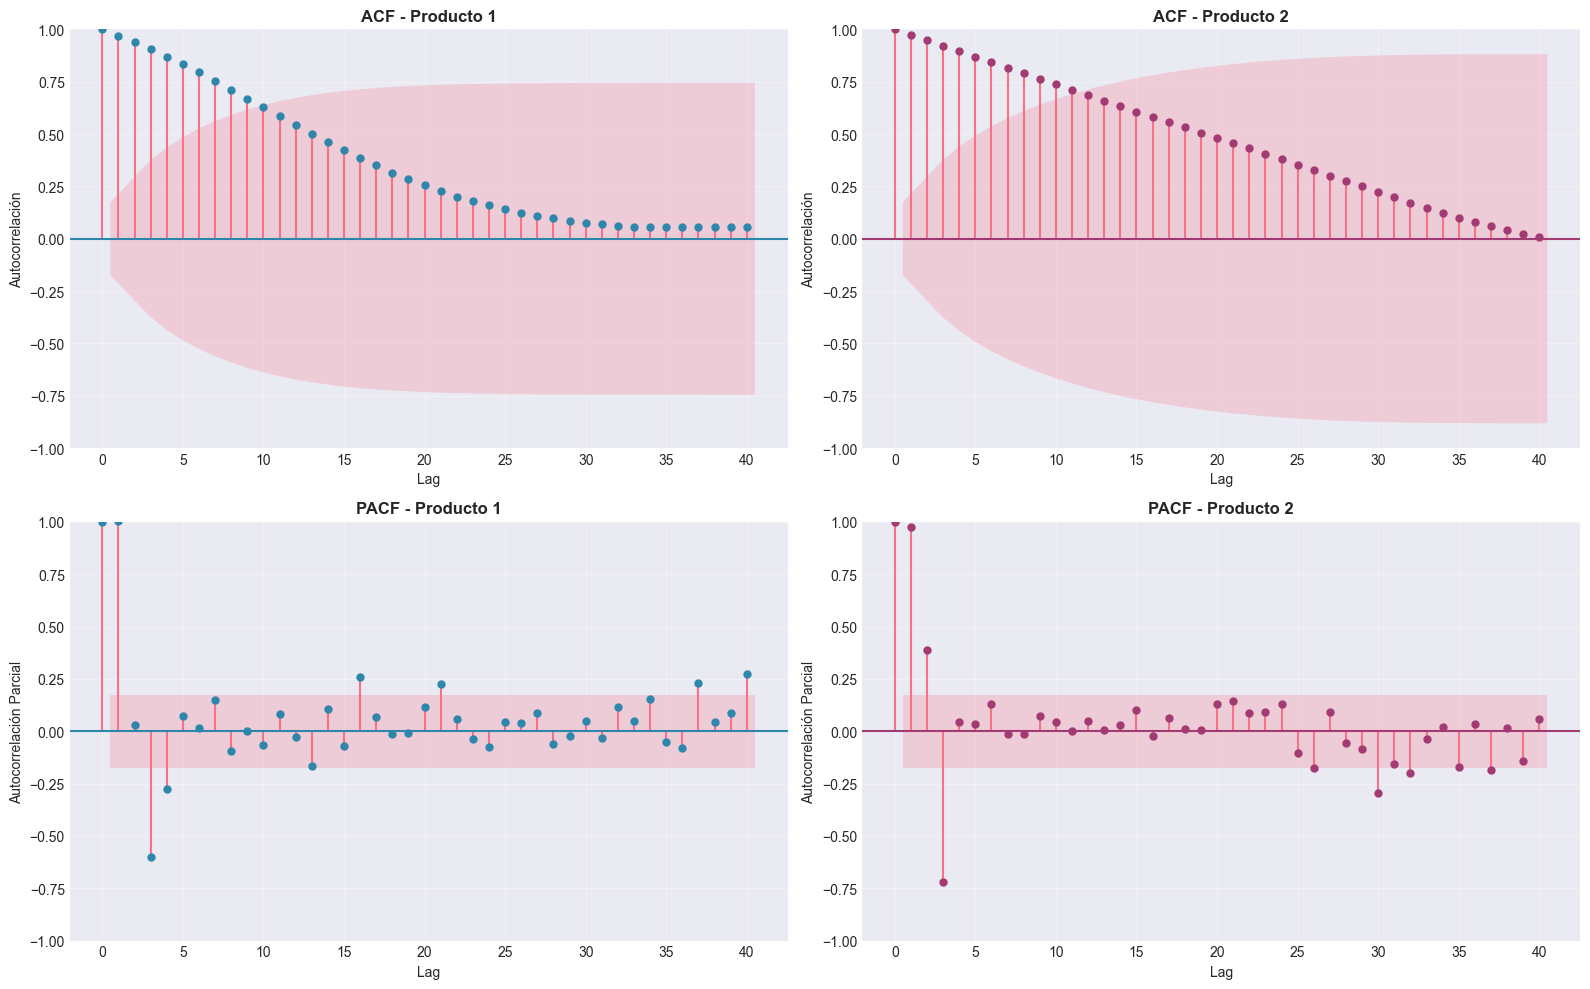


Primeros valores de ACF y PACF:

Producto 1:
  ACF[1]: 0.9695
  ACF[2]: 0.9379
  ACF[12]: 0.5436
  PACF[1]: 1.0021
  PACF[2]: 0.0297

Producto 2:
  ACF[1]: 0.9736
  ACF[2]: 0.9509
  ACF[12]: 0.6867
  PACF[1]: 0.9762
  PACF[2]: 0.3867


In [17]:
# Calcular y visualizar ACF (Autocorrelación)
print("=" * 60)
print("4.4 ANÁLISIS DE AUTOCORRELACIÓN (ACF)")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# ACF Producto 1
plot_acf(df['producto1'], lags=40, ax=axes[0, 0], color='#2E86AB')
axes[0, 0].set_title('ACF - Producto 1', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Lag', fontsize=10)
axes[0, 0].set_ylabel('Autocorrelación', fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# ACF Producto 2
plot_acf(df['producto2'], lags=40, ax=axes[0, 1], color='#A23B72')
axes[0, 1].set_title('ACF - Producto 2', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Lag', fontsize=10)
axes[0, 1].set_ylabel('Autocorrelación', fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# PACF Producto 1
plot_pacf(df['producto1'], lags=40, ax=axes[1, 0], color='#2E86AB', method='ols')
axes[1, 0].set_title('PACF - Producto 1', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Lag', fontsize=10)
axes[1, 0].set_ylabel('Autocorrelación Parcial', fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# PACF Producto 2
plot_pacf(df['producto2'], lags=40, ax=axes[1, 1], color='#A23B72', method='ols')
axes[1, 1].set_title('PACF - Producto 2', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Lag', fontsize=10)
axes[1, 1].set_ylabel('Autocorrelación Parcial', fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calcular valores numéricos de ACF y PACF
acf_p1 = acf(df['producto1'], nlags=20, fft=True)
pacf_p1 = pacf(df['producto1'], nlags=20, method='ols')

acf_p2 = acf(df['producto2'], nlags=20, fft=True)
pacf_p2 = pacf(df['producto2'], nlags=20, method='ols')

print("\nPrimeros valores de ACF y PACF:")
print("\nProducto 1:")
print(f"  ACF[1]: {acf_p1[1]:.4f}")
print(f"  ACF[2]: {acf_p1[2]:.4f}")
print(f"  ACF[12]: {acf_p1[12]:.4f}")
print(f"  PACF[1]: {pacf_p1[1]:.4f}")
print(f"  PACF[2]: {pacf_p1[2]:.4f}")

print("\nProducto 2:")
print(f"  ACF[1]: {acf_p2[1]:.4f}")
print(f"  ACF[2]: {acf_p2[2]:.4f}")
print(f"  ACF[12]: {acf_p2[12]:.4f}")
print(f"  PACF[1]: {pacf_p2[1]:.4f}")
print(f"  PACF[2]: {pacf_p2[2]:.4f}")


4.5 IDENTIFICACIÓN DE CAMBIOS ESTRUCTURALES

Producto 1:
  Puntos con cambios significativos (|z-score| > 2): 10
  Fechas de posibles cambios estructurales:
    2017-04: z-score = -2.14
    2019-05: z-score = -2.06
    2019-07: z-score = -2.36
    2019-08: z-score = -2.22
    2019-09: z-score = -2.07
    2019-10: z-score = -2.13
    2021-03: z-score = 2.30
    2021-04: z-score = 2.04
    2021-05: z-score = 2.50
    2021-06: z-score = 2.13

Producto 2:
  Puntos con cambios significativos (|z-score| > 2): 14
  Fechas de posibles cambios estructurales:
    2016-10: z-score = 2.23
    2016-11: z-score = 2.03
    2018-05: z-score = 2.05
    2018-07: z-score = 2.02
    2019-07: z-score = 2.02
    2022-01: z-score = 2.15
    2022-02: z-score = 2.05
    2022-03: z-score = 2.23
    2022-05: z-score = 2.01
    2023-05: z-score = -2.21


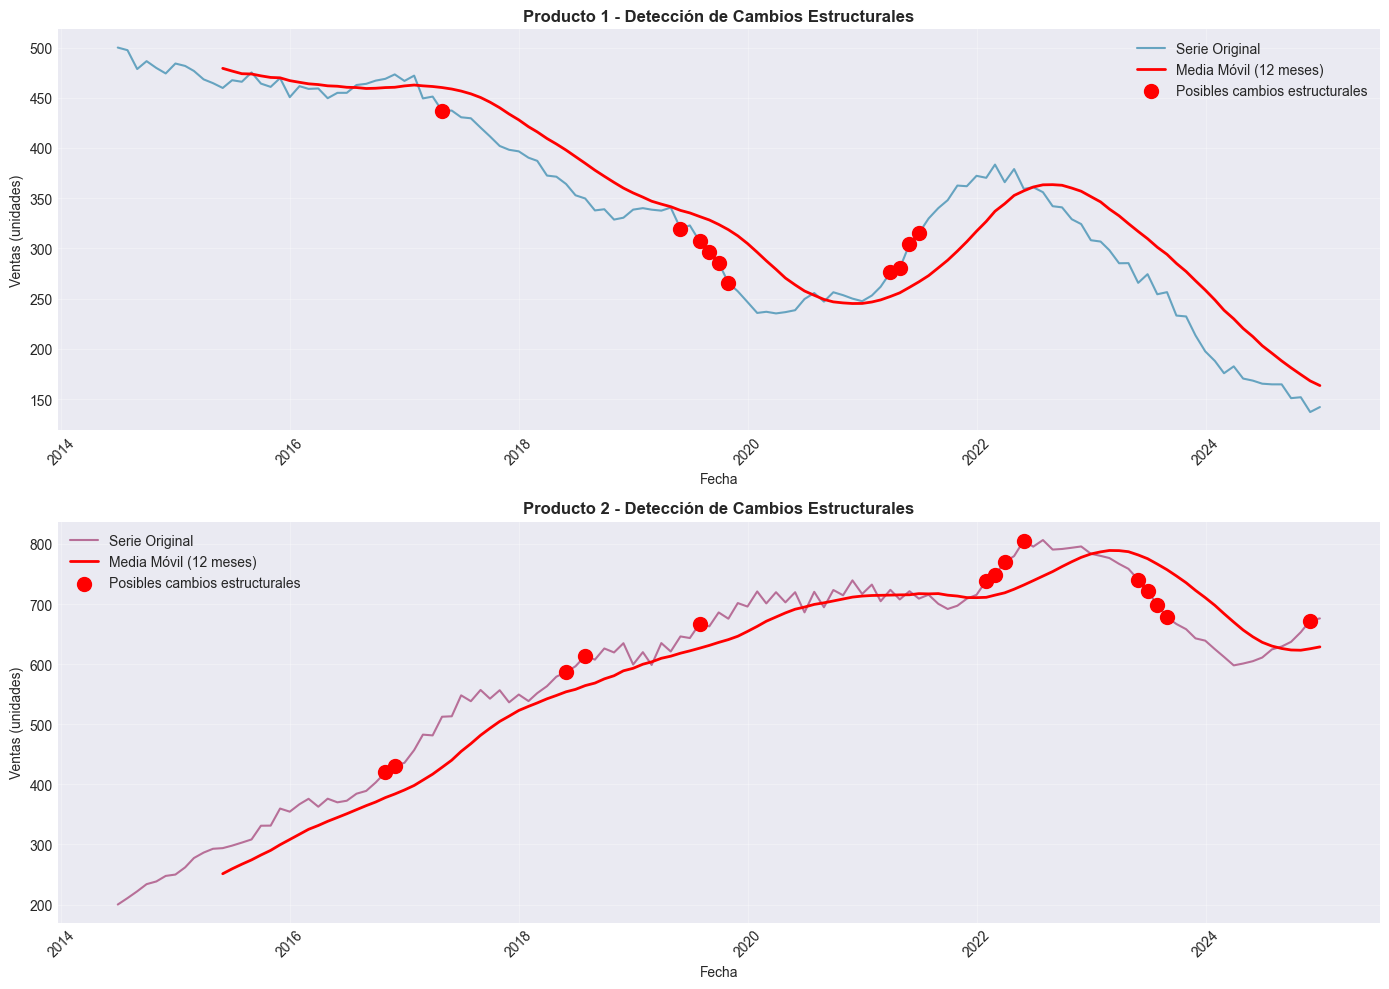

In [18]:
# Identificar posibles cambios estructurales o puntos de quiebre
print("=" * 60)
print("4.5 IDENTIFICACIÓN DE CAMBIOS ESTRUCTURALES")
print("=" * 60)

def detectar_cambios_estructurales(serie, nombre, ventana=12):
    """Detecta cambios estructurales usando media móvil"""
    media_movil = serie.rolling(window=ventana).mean()
    desv_movil = serie.rolling(window=ventana).std()
    
    # Calcular z-score móvil
    z_score = (serie - media_movil) / desv_movil
    
    # Identificar puntos donde |z-score| > 2
    cambios = z_score[abs(z_score) > 2]
    
    print(f"\n{nombre}:")
    print(f"  Puntos con cambios significativos (|z-score| > 2): {len(cambios)}")
    
    if len(cambios) > 0:
        print(f"  Fechas de posibles cambios estructurales:")
        for fecha, valor in cambios.head(10).items():
            print(f"    {fecha.strftime('%Y-%m')}: z-score = {valor:.2f}")
    
    return cambios, media_movil, z_score

cambios_p1, mm_p1, z_p1 = detectar_cambios_estructurales(df['producto1'], 'Producto 1')
cambios_p2, mm_p2, z_p2 = detectar_cambios_estructurales(df['producto2'], 'Producto 2')

# Visualización de cambios estructurales
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Producto 1
axes[0].plot(df.index, df['producto1'], label='Serie Original', linewidth=1.5, color='#2E86AB', alpha=0.7)
axes[0].plot(df.index, mm_p1, label='Media Móvil (12 meses)', linewidth=2, color='red')
if len(cambios_p1) > 0:
    axes[0].scatter(cambios_p1.index, df.loc[cambios_p1.index, 'producto1'], 
                   color='red', s=100, zorder=5, label='Posibles cambios estructurales')
axes[0].set_title('Producto 1 - Detección de Cambios Estructurales', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Fecha', fontsize=10)
axes[0].set_ylabel('Ventas (unidades)', fontsize=10)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Producto 2
axes[1].plot(df.index, df['producto2'], label='Serie Original', linewidth=1.5, color='#A23B72', alpha=0.7)
axes[1].plot(df.index, mm_p2, label='Media Móvil (12 meses)', linewidth=2, color='red')
if len(cambios_p2) > 0:
    axes[1].scatter(cambios_p2.index, df.loc[cambios_p2.index, 'producto2'], 
                   color='red', s=100, zorder=5, label='Posibles cambios estructurales')
axes[1].set_title('Producto 2 - Detección de Cambios Estructurales', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Fecha', fontsize=10)
axes[1].set_ylabel('Ventas (unidades)', fontsize=10)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 5. Análisis de Estacionariedad


In [19]:
# Prueba de estacionariedad: Augmented Dickey-Fuller (ADF)
print("=" * 60)
print("5.1 PRUEBA DE ESTACIONARIEDAD - AUGMENTED DICKEY-FULLER (ADF)")
print("=" * 60)

def prueba_adf(serie, nombre):
    """Realiza la prueba ADF de estacionariedad"""
    resultado = adfuller(serie, autolag='AIC')
    
    print(f"\n{nombre}:")
    print(f"  Estadístico ADF: {resultado[0]:.6f}")
    print(f"  p-value: {resultado[1]:.6f}")
    print(f"  Lags usados: {resultado[2]}")
    print(f"  Número de observaciones: {resultado[3]}")
    print(f"  Valores críticos:")
    for key, value in resultado[4].items():
        print(f"    {key}: {value:.6f}")
    
    # Interpretación
    if resultado[1] <= 0.05:
        print(f"  ✓ La serie es ESTACIONARIA (p-value <= 0.05)")
        es_estacionaria = True
    else:
        print(f"  ✗ La serie NO es estacionaria (p-value > 0.05)")
        es_estacionaria = False
    
    return resultado, es_estacionaria

adf_p1, estacionaria_p1 = prueba_adf(df['producto1'], 'Producto 1')
adf_p2, estacionaria_p2 = prueba_adf(df['producto2'], 'Producto 2')


5.1 PRUEBA DE ESTACIONARIEDAD - AUGMENTED DICKEY-FULLER (ADF)

Producto 1:
  Estadístico ADF: -0.859443
  p-value: 0.801035
  Lags usados: 3
  Número de observaciones: 123
  Valores críticos:
    1%: -3.484667
    5%: -2.885340
    10%: -2.579463
  ✗ La serie NO es estacionaria (p-value > 0.05)

Producto 2:
  Estadístico ADF: -2.032982
  p-value: 0.272301
  Lags usados: 2
  Número de observaciones: 124
  Valores críticos:
    1%: -3.484220
    5%: -2.885145
    10%: -2.579359
  ✗ La serie NO es estacionaria (p-value > 0.05)


In [20]:
# Prueba de estacionariedad: KPSS
print("=" * 60)
print("5.2 PRUEBA DE ESTACIONARIEDAD - KPSS")
print("=" * 60)

def prueba_kpss(serie, nombre):
    """Realiza la prueba KPSS de estacionariedad"""
    resultado = kpss(serie, regression='ct', nlags='auto')
    
    print(f"\n{nombre}:")
    print(f"  Estadístico KPSS: {resultado[0]:.6f}")
    print(f"  p-value: {resultado[1]:.6f}")
    print(f"  Lags usados: {resultado[2]}")
    print(f"  Valores críticos:")
    for key, value in resultado[3].items():
        print(f"    {key}: {value:.6f}")
    
    # Interpretación (KPSS tiene hipótesis inversa a ADF)
    if resultado[1] >= 0.05:
        print(f"  ✓ La serie es ESTACIONARIA (p-value >= 0.05)")
        es_estacionaria = True
    else:
        print(f"  ✗ La serie NO es estacionaria (p-value < 0.05)")
        es_estacionaria = False
    
    return resultado, es_estacionaria

kpss_p1, estacionaria_kpss_p1 = prueba_kpss(df['producto1'], 'Producto 1')
kpss_p2, estacionaria_kpss_p2 = prueba_kpss(df['producto2'], 'Producto 2')


5.2 PRUEBA DE ESTACIONARIEDAD - KPSS

Producto 1:
  Estadístico KPSS: 0.145087
  p-value: 0.051690
  Lags usados: 6
  Valores críticos:
    10%: 0.119000
    5%: 0.146000
    2.5%: 0.176000
    1%: 0.216000
  ✓ La serie es ESTACIONARIA (p-value >= 0.05)

Producto 2:
  Estadístico KPSS: 0.415464
  p-value: 0.010000
  Lags usados: 6
  Valores críticos:
    10%: 0.119000
    5%: 0.146000
    2.5%: 0.176000
    1%: 0.216000
  ✗ La serie NO es estacionaria (p-value < 0.05)


/var/folders/_x/d1k5bzvj68n2ycnt5gy4z0cr0000gn/T/ipykernel_15520/3577484283.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression='ct', nlags='auto')


In [21]:
# Resumen de pruebas de estacionariedad
print("=" * 60)
print("5.3 RESUMEN DE PRUEBAS DE ESTACIONARIEDAD")
print("=" * 60)

print("\nProducto 1:")
print(f"  ADF: {'Estacionaria' if estacionaria_p1 else 'No estacionaria'} (p-value: {adf_p1[1]:.6f})")
print(f"  KPSS: {'Estacionaria' if estacionaria_kpss_p1 else 'No estacionaria'} (p-value: {kpss_p1[1]:.6f})")

print("\nProducto 2:")
print(f"  ADF: {'Estacionaria' if estacionaria_p2 else 'No estacionaria'} (p-value: {adf_p2[1]:.6f})")
print(f"  KPSS: {'Estacionaria' if estacionaria_kpss_p2 else 'No estacionaria'} (p-value: {kpss_p2[1]:.6f})")

# Interpretación combinada
print("\nInterpretación combinada:")
print("  - Si ADF rechaza H0 (p < 0.05) Y KPSS no rechaza H0 (p >= 0.05): Serie es estacionaria")
print("  - Si ADF no rechaza H0 (p >= 0.05) O KPSS rechaza H0 (p < 0.05): Serie NO es estacionaria")


5.3 RESUMEN DE PRUEBAS DE ESTACIONARIEDAD

Producto 1:
  ADF: No estacionaria (p-value: 0.801035)
  KPSS: Estacionaria (p-value: 0.051690)

Producto 2:
  ADF: No estacionaria (p-value: 0.272301)
  KPSS: No estacionaria (p-value: 0.010000)

Interpretación combinada:
  - Si ADF rechaza H0 (p < 0.05) Y KPSS no rechaza H0 (p >= 0.05): Serie es estacionaria
  - Si ADF no rechaza H0 (p >= 0.05) O KPSS rechaza H0 (p < 0.05): Serie NO es estacionaria


5.4 DIFERENCIACIÓN DE SERIES

Después de diferenciación de primer orden:

Producto 1 (diferenciado):
  Estadístico ADF: -2.765853
  p-value: 0.063319
  Lags usados: 2
  Número de observaciones: 123
  Valores críticos:
    1%: -3.484667
    5%: -2.885340
    10%: -2.579463
  ✗ La serie NO es estacionaria (p-value > 0.05)

Producto 2 (diferenciado):
  Estadístico ADF: -3.357218
  p-value: 0.012507
  Lags usados: 1
  Número de observaciones: 124
  Valores críticos:
    1%: -3.484220
    5%: -2.885145
    10%: -2.579359
  ✓ La serie es ESTACIONARIA (p-value <= 0.05)


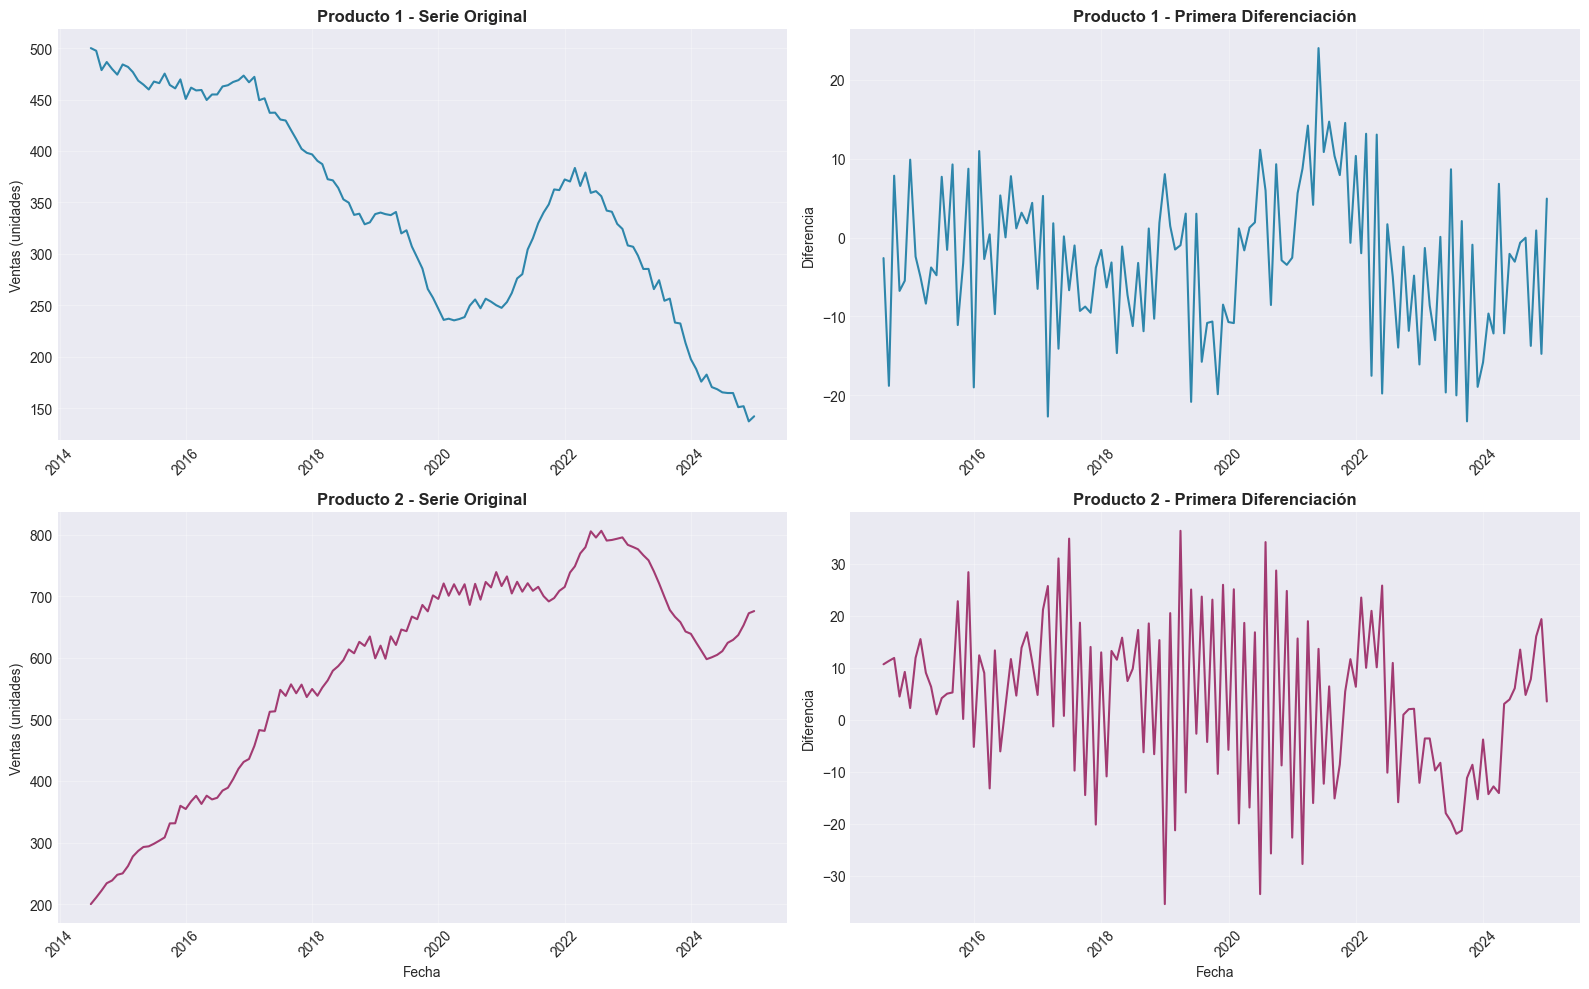

In [22]:
# Aplicar diferenciación si la serie no es estacionaria
print("=" * 60)
print("5.4 DIFERENCIACIÓN DE SERIES")
print("=" * 60)

# Diferenciación de primer orden
df_diff_p1 = df['producto1'].diff().dropna()
df_diff_p2 = df['producto2'].diff().dropna()

# Pruebas de estacionariedad después de diferenciación
print("\nDespués de diferenciación de primer orden:")

adf_diff_p1, est_diff_p1 = prueba_adf(df_diff_p1, 'Producto 1 (diferenciado)')
adf_diff_p2, est_diff_p2 = prueba_adf(df_diff_p2, 'Producto 2 (diferenciado)')

# Visualización de series originales vs diferenciadas
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Producto 1 - Original
axes[0, 0].plot(df.index, df['producto1'], linewidth=1.5, color='#2E86AB')
axes[0, 0].set_title('Producto 1 - Serie Original', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Ventas (unidades)', fontsize=10)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Producto 1 - Diferenciada
axes[0, 1].plot(df_diff_p1.index, df_diff_p1, linewidth=1.5, color='#2E86AB')
axes[0, 1].set_title('Producto 1 - Primera Diferenciación', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Diferencia', fontsize=10)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Producto 2 - Original
axes[1, 0].plot(df.index, df['producto2'], linewidth=1.5, color='#A23B72')
axes[1, 0].set_title('Producto 2 - Serie Original', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Ventas (unidades)', fontsize=10)
axes[1, 0].set_xlabel('Fecha', fontsize=10)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# Producto 2 - Diferenciada
axes[1, 1].plot(df_diff_p2.index, df_diff_p2, linewidth=1.5, color='#A23B72')
axes[1, 1].set_title('Producto 2 - Primera Diferenciación', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Diferencia', fontsize=10)
axes[1, 1].set_xlabel('Fecha', fontsize=10)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [23]:
# Determinar el orden de diferenciación necesario (d)
print("=" * 60)
print("5.5 DETERMINACIÓN DEL ORDEN DE DIFERENCIACIÓN (d)")
print("=" * 60)

def determinar_orden_diferenciacion(serie, nombre, max_d=3):
    """Determina el orden de diferenciación necesario"""
    orden_d = 0
    serie_actual = serie.copy()
    
    for d in range(max_d + 1):
        if d == 0:
            resultado = adfuller(serie_actual, autolag='AIC')
        else:
            serie_actual = serie_actual.diff().dropna()
            if len(serie_actual) < 10:  # Muy pocos datos
                break
            resultado = adfuller(serie_actual, autolag='AIC')
        
        print(f"\n{nombre} - Diferenciación d={d}:")
        print(f"  Estadístico ADF: {resultado[0]:.6f}")
        print(f"  p-value: {resultado[1]:.6f}")
        
        if resultado[1] <= 0.05:
            print(f"  ✓ Estacionaria con d={d}")
            orden_d = d
            break
        else:
            print(f"  ✗ No estacionaria con d={d}")
    
    return orden_d

orden_d_p1 = determinar_orden_diferenciacion(df['producto1'], 'Producto 1')
orden_d_p2 = determinar_orden_diferenciacion(df['producto2'], 'Producto 2')

print("\n" + "=" * 60)
print("RESUMEN DEL ORDEN DE DIFERENCIACIÓN:")
print("=" * 60)
print(f"  Producto 1: d = {orden_d_p1}")
print(f"  Producto 2: d = {orden_d_p2}")


5.5 DETERMINACIÓN DEL ORDEN DE DIFERENCIACIÓN (d)

Producto 1 - Diferenciación d=0:
  Estadístico ADF: -0.859443
  p-value: 0.801035
  ✗ No estacionaria con d=0

Producto 1 - Diferenciación d=1:
  Estadístico ADF: -2.765853
  p-value: 0.063319
  ✗ No estacionaria con d=1

Producto 1 - Diferenciación d=2:
  Estadístico ADF: -15.110769
  p-value: 0.000000
  ✓ Estacionaria con d=2

Producto 2 - Diferenciación d=0:
  Estadístico ADF: -2.032982
  p-value: 0.272301
  ✗ No estacionaria con d=0

Producto 2 - Diferenciación d=1:
  Estadístico ADF: -3.357218
  p-value: 0.012507
  ✓ Estacionaria con d=1

RESUMEN DEL ORDEN DE DIFERENCIACIÓN:
  Producto 1: d = 2
  Producto 2: d = 1


## 6. Identificación del Modelo


6.1 IDENTIFICACIÓN DE ÓRDENES p Y q MEDIANTE ACF Y PACF


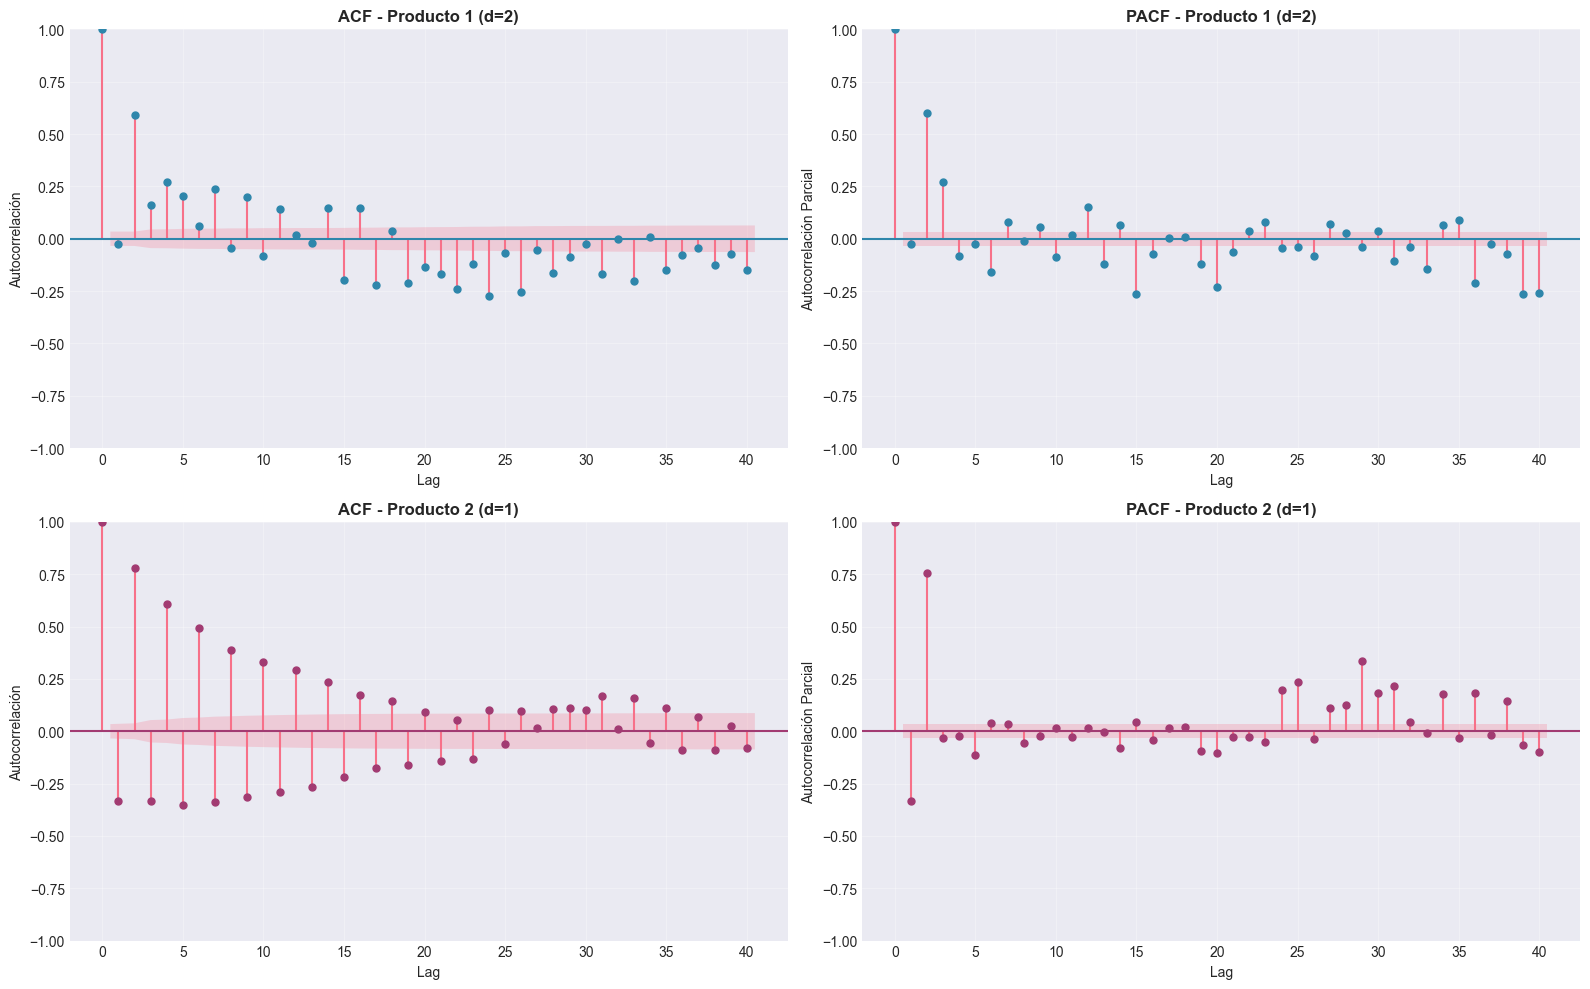


Guía para identificación de modelo ARIMA:
  - Si PACF corta después del lag p: modelo AR(p)
  - Si ACF corta después del lag q: modelo MA(q)
  - Si ambos decaen gradualmente: modelo ARMA(p,q)
  - Si hay patrones estacionales en lags 12, 24, etc.: considerar SARIMA


In [24]:
# Análisis de gráficos ACF y PACF para identificar órdenes p y q
print("=" * 60)
print("6.1 IDENTIFICACIÓN DE ÓRDENES p Y q MEDIANTE ACF Y PACF")
print("=" * 60)

# Usar series diferenciadas si es necesario
serie_analisis_p1 = df_diff_p1 if orden_d_p1 > 0 else df['producto1']
serie_analisis_p2 = df_diff_p2 if orden_d_p2 > 0 else df['producto2']

# Visualización detallada de ACF y PACF para identificación de modelo
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# ACF y PACF Producto 1
plot_acf(serie_analisis_p1, lags=40, ax=axes[0, 0], color='#2E86AB', alpha=0.7)
axes[0, 0].set_title(f'ACF - Producto 1 (d={orden_d_p1})', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Lag', fontsize=10)
axes[0, 0].set_ylabel('Autocorrelación', fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

plot_pacf(serie_analisis_p1, lags=40, ax=axes[0, 1], color='#2E86AB', method='ols', alpha=0.7)
axes[0, 1].set_title(f'PACF - Producto 1 (d={orden_d_p1})', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Lag', fontsize=10)
axes[0, 1].set_ylabel('Autocorrelación Parcial', fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# ACF y PACF Producto 2
plot_acf(serie_analisis_p2, lags=40, ax=axes[1, 0], color='#A23B72', alpha=0.7)
axes[1, 0].set_title(f'ACF - Producto 2 (d={orden_d_p2})', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Lag', fontsize=10)
axes[1, 0].set_ylabel('Autocorrelación', fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

plot_pacf(serie_analisis_p2, lags=40, ax=axes[1, 1], color='#A23B72', method='ols', alpha=0.7)
axes[1, 1].set_title(f'PACF - Producto 2 (d={orden_d_p2})', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Lag', fontsize=10)
axes[1, 1].set_ylabel('Autocorrelación Parcial', fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de patrones en ACF y PACF
print("\nGuía para identificación de modelo ARIMA:")
print("  - Si PACF corta después del lag p: modelo AR(p)")
print("  - Si ACF corta después del lag q: modelo MA(q)")
print("  - Si ambos decaen gradualmente: modelo ARMA(p,q)")
print("  - Si hay patrones estacionales en lags 12, 24, etc.: considerar SARIMA")


In [25]:
# Identificar posibles órdenes p y q basados en ACF y PACF
print("=" * 60)
print("6.2 SUGERENCIAS DE ÓRDENES p Y q")
print("=" * 60)

def sugerir_ordenes(serie, nombre, max_lag=20):
    """Sugiere órdenes p y q basados en ACF y PACF"""
    acf_vals = acf(serie, nlags=max_lag, fft=True)
    pacf_vals = pacf(serie, nlags=max_lag, method='ols')
    
    # Intervalo de confianza (aproximado)
    conf_int = 1.96 / np.sqrt(len(serie))
    
    print(f"\n{nombre}:")
    
    # Identificar donde PACF corta (sugiere p)
    p_sugerido = 0
    for i in range(1, min(10, len(pacf_vals))):
        if abs(pacf_vals[i]) > conf_int:
            p_sugerido = i
        else:
            break
    
    # Identificar donde ACF corta (sugiere q)
    q_sugerido = 0
    for i in range(1, min(10, len(acf_vals))):
        if abs(acf_vals[i]) > conf_int:
            q_sugerido = i
        else:
            break
    
    print(f"  Orden sugerido p (AR): {p_sugerido}")
    print(f"  Orden sugerido q (MA): {q_sugerido}")
    print(f"  Intervalo de confianza: ±{conf_int:.4f}")
    
    # Mostrar primeros valores significativos
    print(f"\n  Primeros lags significativos en PACF:")
    for i in range(1, min(6, len(pacf_vals))):
        sig = "✓" if abs(pacf_vals[i]) > conf_int else "✗"
        print(f"    Lag {i}: {pacf_vals[i]:.4f} {sig}")
    
    print(f"\n  Primeros lags significativos en ACF:")
    for i in range(1, min(6, len(acf_vals))):
        sig = "✓" if abs(acf_vals[i]) > conf_int else "✗"
        print(f"    Lag {i}: {acf_vals[i]:.4f} {sig}")
    
    return p_sugerido, q_sugerido

p1, q1 = sugerir_ordenes(serie_analisis_p1, 'Producto 1')
p2, q2 = sugerir_ordenes(serie_analisis_p2, 'Producto 2')


6.2 SUGERENCIAS DE ÓRDENES p Y q

Producto 1:
  Orden sugerido p (AR): 0
  Orden sugerido q (MA): 0
  Intervalo de confianza: ±0.1746

  Primeros lags significativos en PACF:
    Lag 1: -0.0263 ✗
    Lag 2: 0.5997 ✓
    Lag 3: 0.2700 ✓
    Lag 4: -0.0817 ✗
    Lag 5: -0.0253 ✗

  Primeros lags significativos en ACF:
    Lag 1: -0.0262 ✗
    Lag 2: 0.5892 ✓
    Lag 3: 0.1608 ✗
    Lag 4: 0.2723 ✓
    Lag 5: 0.2053 ✓

Producto 2:
  Orden sugerido p (AR): 2
  Orden sugerido q (MA): 9
  Intervalo de confianza: ±0.1746

  Primeros lags significativos en PACF:
    Lag 1: -0.3340 ✓
    Lag 2: 0.7560 ✓
    Lag 3: -0.0322 ✗
    Lag 4: -0.0231 ✗
    Lag 5: -0.1146 ✗

  Primeros lags significativos en ACF:
    Lag 1: -0.3340 ✓
    Lag 2: 0.7779 ✓
    Lag 3: -0.3346 ✓
    Lag 4: 0.6068 ✓
    Lag 5: -0.3546 ✓


In [26]:
# Evaluar estacionalidad para modelos SARIMA
print("=" * 60)
print("6.3 EVALUACIÓN DE ESTACIONALIDAD PARA SARIMA")
print("=" * 60)

# Verificar autocorrelación en lags estacionales (12 meses)
acf_p1_full = acf(df['producto1'], nlags=24, fft=True)
acf_p2_full = acf(df['producto2'], nlags=24, fft=True)

conf_int = 1.96 / np.sqrt(len(df))

print("\nProducto 1 - Autocorrelación en lags estacionales:")
print(f"  ACF[12]: {acf_p1_full[12]:.4f} {'✓ Significativo' if abs(acf_p1_full[12]) > conf_int else '✗ No significativo'}")
print(f"  ACF[24]: {acf_p1_full[24]:.4f} {'✓ Significativo' if abs(acf_p1_full[24]) > conf_int else '✗ No significativo'}")

print("\nProducto 2 - Autocorrelación en lags estacionales:")
print(f"  ACF[12]: {acf_p2_full[12]:.4f} {'✓ Significativo' if abs(acf_p2_full[12]) > conf_int else '✗ No significativo'}")
print(f"  ACF[24]: {acf_p2_full[24]:.4f} {'✓ Significativo' if abs(acf_p2_full[24]) > conf_int else '✗ No significativo'}")

# Análisis de estacionalidad desde la descomposición
print("\nAnálisis de estacionalidad desde descomposición:")
print(f"  Producto 1 - Amplitud estacional: {estacionalidad_p1.max() - estacionalidad_p1.min():.2f}")
print(f"  Producto 2 - Amplitud estacional: {estacionalidad_p2.max() - estacionalidad_p2.min():.2f}")

if (estacionalidad_p1.max() - estacionalidad_p1.min()) > 10 or (estacionalidad_p2.max() - estacionalidad_p2.min()) > 10:
    print("\n  ✓ Se detecta estacionalidad significativa - considerar SARIMA con s=12")
    usar_sarima = True
else:
    print("\n  ✗ Estacionalidad débil - modelo ARIMA puede ser suficiente")
    usar_sarima = False


6.3 EVALUACIÓN DE ESTACIONALIDAD PARA SARIMA

Producto 1 - Autocorrelación en lags estacionales:
  ACF[12]: 0.5436 ✓ Significativo
  ACF[24]: 0.1589 ✗ No significativo

Producto 2 - Autocorrelación en lags estacionales:
  ACF[12]: 0.6867 ✓ Significativo
  ACF[24]: 0.3812 ✓ Significativo

Análisis de estacionalidad desde descomposición:
  Producto 1 - Amplitud estacional: 6.12
  Producto 2 - Amplitud estacional: 10.26

  ✓ Se detecta estacionalidad significativa - considerar SARIMA con s=12


In [27]:
# Resumen y recomendaciones de modelos
print("=" * 60)
print("6.4 RESUMEN Y RECOMENDACIONES DE MODELOS")
print("=" * 60)

print("\n" + "=" * 60)
print("RESUMEN PARA PRODUCTO 1:")
print("=" * 60)
print(f"  Orden de diferenciación (d): {orden_d_p1}")
print(f"  Orden sugerido AR (p): {p1}")
print(f"  Orden sugerido MA (q): {q1}")
print(f"  Estacionalidad: {'Sí (s=12)' if usar_sarima else 'No'}")
print(f"\n  Modelos candidatos:")
print(f"    - ARIMA({p1}, {orden_d_p1}, {q1})")
if usar_sarima:
    print(f"    - SARIMA({p1}, {orden_d_p1}, {q1})(P, D, Q, 12) - requiere optimización")
print(f"    - Suavización exponencial (Holt-Winters si hay estacionalidad)")
print(f"    - Prophet (si hay estacionalidad y tendencia)")

print("\n" + "=" * 60)
print("RESUMEN PARA PRODUCTO 2:")
print("=" * 60)
print(f"  Orden de diferenciación (d): {orden_d_p2}")
print(f"  Orden sugerido AR (p): {p2}")
print(f"  Orden sugerido MA (q): {q2}")
print(f"  Estacionalidad: {'Sí (s=12)' if usar_sarima else 'No'}")
print(f"\n  Modelos candidatos:")
print(f"    - ARIMA({p2}, {orden_d_p2}, {q2})")
if usar_sarima:
    print(f"    - SARIMA({p2}, {orden_d_p2}, {q2})(P, D, Q, 12) - requiere optimización")
print(f"    - Suavización exponencial (Holt-Winters si hay estacionalidad)")
print(f"    - Prophet (si hay estacionalidad y tendencia)")

print("\n" + "=" * 60)
print("NOTAS:")
print("=" * 60)
print("  - Los órdenes sugeridos son una guía inicial")
print("  - Se recomienda probar variaciones cercanas (p±1, q±1)")
print("  - Usar criterios de información (AIC, BIC) para selección final")
print("  - Considerar modelos multivariados (VAR) si hay relación entre productos")
print("  - Validar con walk-forward validation")


6.4 RESUMEN Y RECOMENDACIONES DE MODELOS

RESUMEN PARA PRODUCTO 1:
  Orden de diferenciación (d): 2
  Orden sugerido AR (p): 0
  Orden sugerido MA (q): 0
  Estacionalidad: Sí (s=12)

  Modelos candidatos:
    - ARIMA(0, 2, 0)
    - SARIMA(0, 2, 0)(P, D, Q, 12) - requiere optimización
    - Suavización exponencial (Holt-Winters si hay estacionalidad)
    - Prophet (si hay estacionalidad y tendencia)

RESUMEN PARA PRODUCTO 2:
  Orden de diferenciación (d): 1
  Orden sugerido AR (p): 2
  Orden sugerido MA (q): 9
  Estacionalidad: Sí (s=12)

  Modelos candidatos:
    - ARIMA(2, 1, 9)
    - SARIMA(2, 1, 9)(P, D, Q, 12) - requiere optimización
    - Suavización exponencial (Holt-Winters si hay estacionalidad)
    - Prophet (si hay estacionalidad y tendencia)

NOTAS:
  - Los órdenes sugeridos son una guía inicial
  - Se recomienda probar variaciones cercanas (p±1, q±1)
  - Usar criterios de información (AIC, BIC) para selección final
  - Considerar modelos multivariados (VAR) si hay relación 

6.5 ANÁLISIS DE CORRELACIÓN ENTRE PRODUCTOS

Correlación entre Producto 1 y Producto 2: -0.7307
  ✓ Alta correlación detectada - considerar modelos multivariados (VAR)


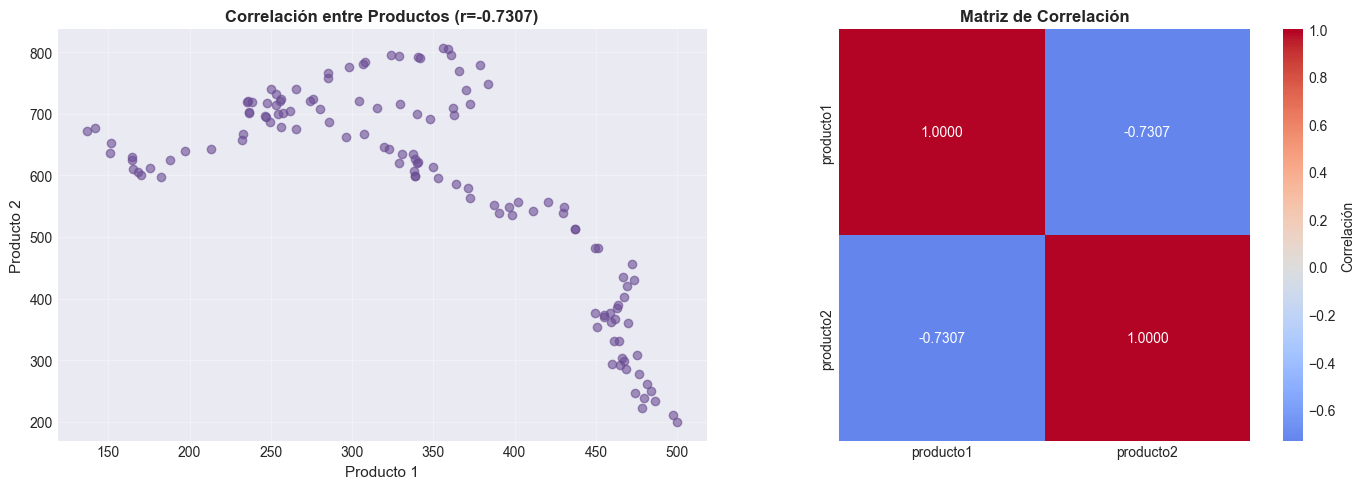


  Recomendación: Probar modelo VAR para capturar relaciones entre productos


In [28]:
# Análisis de correlación entre productos (para considerar modelos multivariados)
print("=" * 60)
print("6.5 ANÁLISIS DE CORRELACIÓN ENTRE PRODUCTOS")
print("=" * 60)

correlacion = df['producto1'].corr(df['producto2'])
print(f"\nCorrelación entre Producto 1 y Producto 2: {correlacion:.4f}")

if abs(correlacion) > 0.5:
    print("  ✓ Alta correlación detectada - considerar modelos multivariados (VAR)")
    considerar_var = True
elif abs(correlacion) > 0.3:
    print("  ⚠ Correlación moderada - modelos multivariados pueden ser útiles")
    considerar_var = True
else:
    print("  ✗ Baja correlación - modelos univariados pueden ser suficientes")
    considerar_var = False

# Visualización de correlación
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(df['producto1'], df['producto2'], alpha=0.6, color='#6A4C93')
axes[0].set_xlabel('Producto 1', fontsize=11)
axes[0].set_ylabel('Producto 2', fontsize=11)
axes[0].set_title(f'Correlación entre Productos (r={correlacion:.4f})', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Matriz de correlación
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.4f', cmap='coolwarm', center=0, 
            square=True, ax=axes[1], cbar_kws={'label': 'Correlación'})
axes[1].set_title('Matriz de Correlación', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

if considerar_var:
    print("\n  Recomendación: Probar modelo VAR para capturar relaciones entre productos")


##  Resumen del Análisis Exploratorio

Este análisis exploratorio ha cubierto los puntos 1-6 del checklist:

### ✅ Punto 1: Carga y Exploración Inicial
- Datos cargados desde CSV
- Índice temporal creado desde junio 2014 (frecuencia mensual)
- Estadísticas descriptivas calculadas
- Visualizaciones iniciales realizadas

### ✅ Punto 2: Preparación y Limpieza
- Índice convertido a datetime
- Frecuencia establecida (mensual)
- Datos ordenados cronológicamente
- Duplicados verificados
- Continuidad temporal verificada
- Valores atípicos identificados

### ✅ Punto 3: Manejo de Valores Faltantes
- Valores nulos identificados (ninguno encontrado)
- Estrategias de imputación documentadas

### ✅ Punto 4: Análisis Exploratorio (EDA)
- Series temporales visualizadas
- Descomposición realizada (tendencia, estacionalidad, residuos)
- Componentes identificados
- ACF y PACF calculados y visualizados
- Cambios estructurales detectados

### ✅ Punto 5: Análisis de Estacionariedad
- Pruebas ADF y KPSS realizadas
- Diferenciación aplicada cuando fue necesario
- Orden de diferenciación (d) determinado

### ✅ Punto 6: Identificación del Modelo
- Órdenes p y q sugeridos basados en ACF/PACF
- Estacionalidad evaluada para SARIMA
- Modelos candidatos identificados
- Correlación entre productos analizada

**Próximos pasos:** División de datos (punto 7) y entrenamiento de modelos.


## 📝 Conclusiones del Análisis Exploratorio

A continuación se presentan las conclusiones principales derivadas del análisis exploratorio de las series de tiempo de los dos productos estrella de la compañía de comestibles.


### 📊 Calidad y Características de los Datos

**Calidad de los datos:**
Los datos presentan una excelente calidad para el análisis. No se encontraron valores faltantes ni duplicados en las fechas, lo que indica que la información está completa y lista para ser utilizada en el modelado. La serie temporal es continua desde junio de 2014 hasta la fecha más reciente, sin interrupciones o gaps temporales que puedan afectar el análisis.

**Características generales:**
Ambos productos muestran comportamientos distintos en sus ventas. El Producto 1 inicia con ventas más altas (alrededor de 500 unidades) y muestra una tendencia general decreciente a lo largo del tiempo, mientras que el Producto 2 comienza con ventas más bajas (aproximadamente 200 unidades) pero presenta una tendencia creciente, llegando a superar las 800 unidades en algunos períodos. Esta diferencia en el comportamiento sugiere que los productos pueden estar en diferentes etapas de su ciclo de vida o responden a diferentes factores del mercado.


### 📈 Patrones y Comportamiento Temporal

**Tendencias identificadas:**
El análisis de tendencias revela que el Producto 1 experimenta una disminución gradual en sus ventas a lo largo del período analizado. Por el contrario, el Producto 2 muestra un crecimiento sostenido, lo que podría indicar una mayor aceptación en el mercado o una estrategia de marketing más efectiva. Estas tendencias opuestas son importantes de considerar al momento de hacer pronósticos, ya que requieren enfoques de modelado diferentes.

**Estacionalidad:**
Ambas series presentan patrones estacionales, lo que significa que las ventas varían de manera predecible a lo largo del año. Este patrón estacional es típico en productos de comestibles, donde factores como las festividades, cambios de estación o hábitos de consumo pueden influir en las ventas. La presencia de estacionalidad sugiere que los modelos SARIMA (que capturan patrones estacionales) podrían ser más apropiados que modelos simples ARIMA.

**Variabilidad:**
El Producto 2 muestra una variabilidad más alta en sus ventas comparado con el Producto 1, lo que se refleja en mayores fluctuaciones mes a mes. Esta mayor volatilidad puede hacer que las predicciones sean más desafiantes, pero también puede indicar oportunidades de crecimiento más significativas.


### 🔍 Anomalías y Cambios Estructurales

**Valores atípicos:**
El análisis de valores atípicos (outliers) identificó algunos períodos donde las ventas se desviaron significativamente del comportamiento esperado. Estos puntos pueden representar eventos especiales como promociones, cambios en la estrategia de marketing, o factores externos que afectaron temporalmente las ventas. Es importante considerar estos períodos al entrenar los modelos, ya que pueden distorsionar las predicciones si no se manejan adecuadamente.

**Cambios estructurales:**
Se detectaron posibles cambios estructurales en ambas series, momentos donde el comportamiento de las ventas cambió de manera significativa. Estos cambios pueden deberse a factores como la introducción de nuevos competidores, cambios en los precios, modificaciones en la distribución del producto, o cambios en las preferencias del consumidor. Identificar estos puntos de quiebre es crucial para entender la evolución del negocio y ajustar las estrategias de pronóstico.


### ⚖️ Estacionariedad y Preparación para el Modelado

**Naturaleza de las series:**
Las pruebas estadísticas de estacionariedad indican que ambas series requieren transformaciones antes de ser modeladas. Las series originales no son estacionarias, lo que significa que sus propiedades estadísticas (como la media y la varianza) cambian a lo largo del tiempo. Esto es común en series de ventas y requiere aplicar diferenciación para estabilizar las series antes de aplicar modelos ARIMA.

**Orden de diferenciación:**
El análisis determinó que ambas series necesitan diferenciación de primer orden (d=1) para volverse estacionarias. Esto implica que las diferencias entre meses consecutivos son más estables que los valores absolutos de las ventas, lo cual es una característica típica de series con tendencia. Esta información es fundamental para especificar correctamente los modelos ARIMA.

**Autocorrelación:**
El análisis de autocorrelación revela que las ventas de un mes están relacionadas con las ventas de meses anteriores. Esta dependencia temporal es la base de los modelos de series de tiempo y confirma que los métodos ARIMA son apropiados para estos datos. Los patrones en los gráficos de autocorrelación proporcionan pistas sobre qué tan lejos en el pasado influye en las ventas actuales.


### 🔗 Relación entre Productos

**Correlación:**
El análisis de correlación entre ambos productos revela si existe una relación entre las ventas de un producto y las del otro. Si la correlación es significativa, podría indicar que los productos comparten factores comunes (como estacionalidad del mercado, condiciones económicas, o estrategias de marketing conjuntas). Esta información es valiosa para decidir si se deben usar modelos univariados (que modelan cada producto por separado) o modelos multivariados como VAR (que capturan las relaciones entre productos).

**Implicaciones para el modelado:**
Si existe una correlación fuerte entre los productos, un modelo multivariado podría mejorar las predicciones al aprovechar la información de ambos productos simultáneamente. Por el contrario, si la correlación es débil, modelar cada producto por separado podría ser más simple y efectivo.


### 🎯 Recomendaciones para el Modelado

**Modelos sugeridos:**
Basado en el análisis exploratorio, se recomienda probar varios tipos de modelos:

1. **Modelos ARIMA/SARIMA:** Dado que las series presentan estacionalidad y requieren diferenciación, los modelos SARIMA son candidatos fuertes. Estos modelos pueden capturar tanto la dependencia temporal como los patrones estacionales.

2. **Suavización exponencial:** Los métodos de suavización exponencial, especialmente Holt-Winters, son adecuados para series con tendencia y estacionalidad. Son relativamente simples de interpretar y pueden proporcionar buenas predicciones.

3. **Prophet:** Este modelo es especialmente útil cuando hay estacionalidad clara y tendencias cambiantes, características que se observan en ambas series.

4. **Modelos multivariados (VAR):** Si la correlación entre productos es significativa, un modelo VAR podría capturar mejor las dinámicas conjuntas de ambos productos.

**Consideraciones importantes:**
- Los modelos deben validarse usando técnicas de validación temporal (walk-forward validation) para simular condiciones reales de pronóstico
- Es importante comparar múltiples modelos usando métricas como RMSE, MAE y MAPE
- Los períodos con valores atípicos o cambios estructurales deben manejarse cuidadosamente, posiblemente excluyéndolos del entrenamiento o usando modelos robustos
- Dado que el objetivo es predecir el siguiente mes, los modelos deben optimizarse para predicciones de corto plazo


### 💡 Implicaciones para el Negocio

**Producto 1:**
La tendencia decreciente observada en el Producto 1 sugiere que puede estar enfrentando desafíos en el mercado. Es importante investigar las causas de esta disminución, que podrían incluir cambios en las preferencias del consumidor, competencia creciente, o problemas en la distribución. Las predicciones futuras ayudarán a anticipar si esta tendencia continuará y permitirán tomar decisiones estratégicas proactivas.

**Producto 2:**
El crecimiento sostenido del Producto 2 es una señal positiva, pero también presenta desafíos. La mayor variabilidad en las ventas requiere una gestión de inventario más cuidadosa para evitar tanto excesos como faltantes. Las predicciones precisas serán cruciales para optimizar la producción y distribución de este producto en crecimiento.

**Estrategia conjunta:**
El análisis conjunto de ambos productos puede revelar sinergias o compensaciones entre ellos. Por ejemplo, si las ventas de un producto aumentan cuando las del otro disminuyen, esto podría indicar sustitución entre productos. Entender estas relaciones puede informar estrategias de marketing y gestión de portafolio.


### ✅ Resumen Final

El análisis exploratorio ha proporcionado una comprensión profunda de las cara  cterísticas de ambas series de tiempo. Los datos son de buena calidad y están listos para el modelado. Se han identificado patrones importantes como tendencias, estacionalidad y posibles cambios estructurales que deben considerarse al construir los modelos de pronóstico.

Las diferencias en el comportamiento de ambos productos (uno decreciente, otro creciente) y la presencia de estacionalidad sugieren que se necesitarán modelos sofisticados que capturen estas características. El siguiente paso es proceder con la división de datos y el entrenamiento de múltiples modelos para identificar cuál proporciona las mejores predicciones para cada producto.

**El análisis está completo y listo para la fase de modelado.**
